In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
run=15
ivar=16
rundir=f"run{run}_ivar{ivar}/"

In [6]:
ts = np.load(rundir + "ts{}.npz".format(ivar))

In [7]:
filename = rundir + "SinkParticles.csv"
fieldnames = ["Identifier","TimeFormed", "Density", "Diameter", "Mass", "NumIce", "NumSil", "NumTot"]

sink_data = pd.read_csv(filename)

# sink_data = sink_data[sink_data["Status"] == 1]

sink_id       = sink_data[fieldnames[0]] 
time_formed   = sink_data[fieldnames[1]]  # in radians
sink_density  = sink_data[fieldnames[2]]  # in cgs
sink_diameter = sink_data[fieldnames[3]]  # in km
sink_mass     = sink_data[fieldnames[4]]  # in cgs
sink_frac_ice = sink_data[fieldnames[5]] / sink_data[fieldnames[-1]] * 100

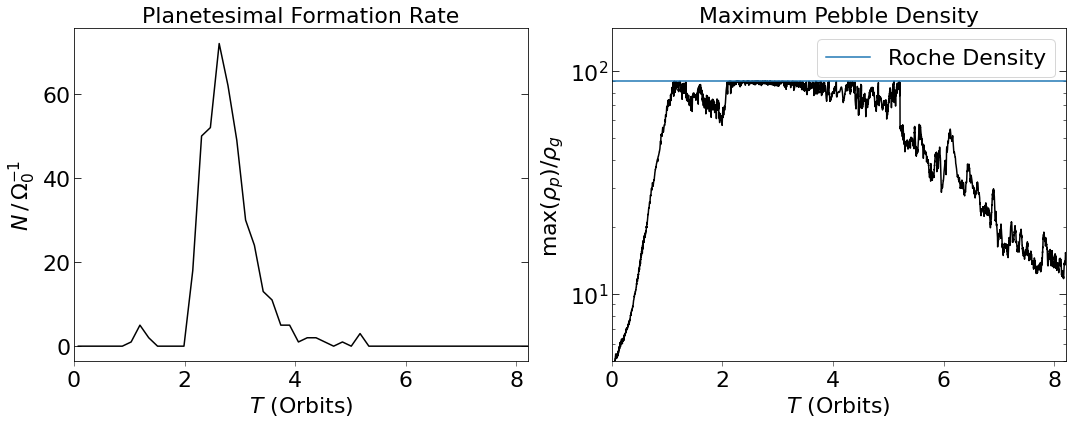

In [70]:
fig = plt.figure(figsize=(15,6))

large=22
medium=16
small=14
xsmall=12

ax1 = fig.add_subplot(121)

t = np.array(time_formed) / (2 * np.pi)
bins=np.linspace(0,54,55)/2/pi
a = np.histogram(t,bins=bins)
n=len(bins)
ax1.plot(.5*(bins[0:n-1]+bins[1:n]),a[0],color='black')

ax1.set_xlabel(r"$T$ (Orbits)", fontsize=large)
ax1.set_xlim(np.min(ts['t']), np.max(ts['t']) / (2 * np.pi))
ax1.set_ylabel(r'$N\,/\,\Omega_0^{-1}$', fontsize=large)
#ax1.set_yscale('log')
ax1.tick_params(axis='x', which='major', labelsize=large, length=5, width=0.5)
ax1.tick_params(axis='y', which='major', direction='in', labelsize=large, length=7, right=True)
ax1.tick_params(axis='y', which='minor', direction='in', labelsize=large, length=3, right=True)
ax1.set_title("Planetesimal Formation Rate",fontsize=large)

ax2 = fig.add_subplot(122)
ax2.plot(ts['t'] / (2 * np.pi), ts['rhopinterp'], c='k')
ax2.set_yscale('log')
ax2.set_xlabel(r"$T$ (Orbits)", fontsize=large)
ax2.set_ylabel("max$\\left(\\rho_{p}\\right)/\\rho_{g}$", fontsize=large)
ax2.set_xlim(0, np.max(ts['t'] / (2*np.pi)))
ax2.set_ylim(5, 1.55e2)
#ax2.hlines(90, ax.get_xlim()[0], ax.get_xlim()[1], label="Roche Density")
ax2.axhline(90, label="Roche Density")
ax2.tick_params(axis='x', which='major', labelsize=large, length=5, width=0.5)
ax2.tick_params(axis='y', which='major', direction='in', labelsize=large, length=7, right=True)
ax2.tick_params(axis='y', which='minor', direction='in', labelsize=large, length=3, right=True)
ax2.set_title("Maximum Pebble Density",fontsize=large)
ax2.legend(fontsize=large)

plt.tight_layout()

plt.savefig("runA_rhopmax_and_dt.pdf")
